# SD212: Graph mining
## Solution to Lab 2: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [5]:
n = 10

In [6]:
dataset = linear_graph(n, True)
adjacency = dataset.adjacency
position = dataset.position

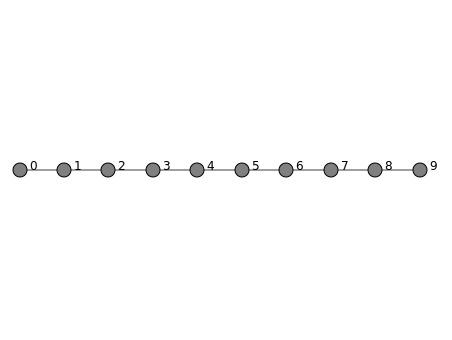

In [7]:
image = svg_graph(adjacency, position, names=np.arange(n))
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$? You need to compute it!

In [8]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [9]:
scores = pagerank.fit_transform(adjacency)

In [10]:
scores

array([0.06438442, 0.11619864, 0.1093456 , 0.10579102, 0.10428032,
       0.10428032, 0.10579102, 0.1093456 , 0.11619864, 0.06438442])

In [11]:
np.sum(scores)

1.0

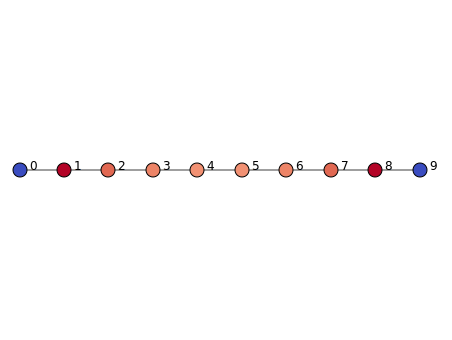

In [12]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)
SVG(image)

## Les Misérables


In [13]:
dataset = miserables(True)

In [14]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

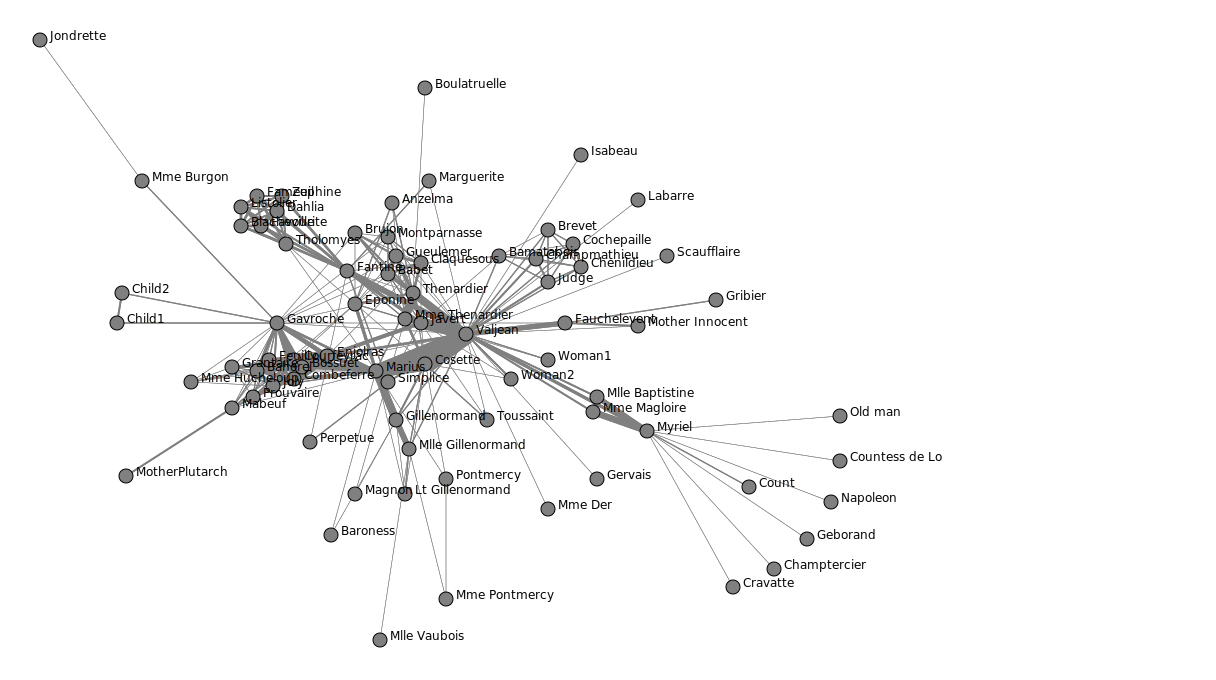

In [15]:
image = svg_graph(adjacency, position, names, scale=2)
SVG(image)

## To do

* Display the graph with PageRank scores.
* List the 10 best ranked characters.
* Compare with:
    1. the 10 nodes of highest degrees
    2. the 10 nodes of highest weights
* Try different values of $\alpha$ and interpret the results.

In [16]:
pagerank = PageRank(damping_factor=0.95, solver='lanczos')

In [17]:
scores = pagerank.fit_transform(adjacency)

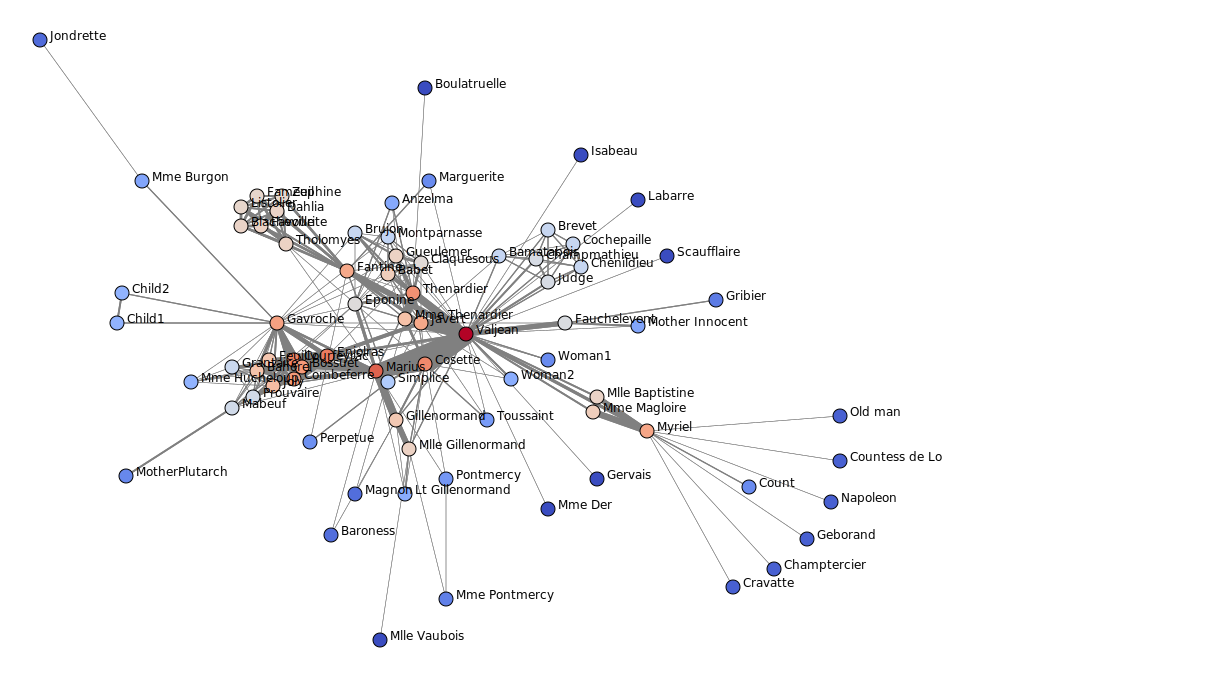

In [18]:
# scores in log scale appear more clearly
image = svg_graph(adjacency, position, names, scores=np.log(scores), scale=2)
SVG(image)

In [19]:
top_nodes = top_k(scores, 10)

In [20]:
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Valjean
2 Marius
3 Enjolras
4 Courfeyrac
5 Cosette
6 Thenardier
7 Combeferre
8 Bossuet
9 Gavroche
10 Myriel


In [21]:
n = adjacency.shape[0]
degrees = (adjacency > 0).dot(np.ones(n))

In [22]:
top_nodes_degrees = top_k(degrees, 10)

In [23]:
for i, node in enumerate(top_nodes_degrees):
    print(i + 1, names[node])

1 Valjean
2 Gavroche
3 Marius
4 Javert
5 Thenardier
6 Enjolras
7 Fantine
8 Bossuet
9 Courfeyrac
10 Bahorel


In [24]:
n = adjacency.shape[0]
weights = adjacency.dot(np.ones(n))

In [25]:
top_nodes_weights = top_k(weights, 10)

In [26]:
for i, node in enumerate(top_nodes_degrees):
    print(i + 1, names[node])

1 Valjean
2 Gavroche
3 Marius
4 Javert
5 Thenardier
6 Enjolras
7 Fantine
8 Bossuet
9 Courfeyrac
10 Bahorel


## Openflights


In [27]:
dataset = openflights

In [28]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

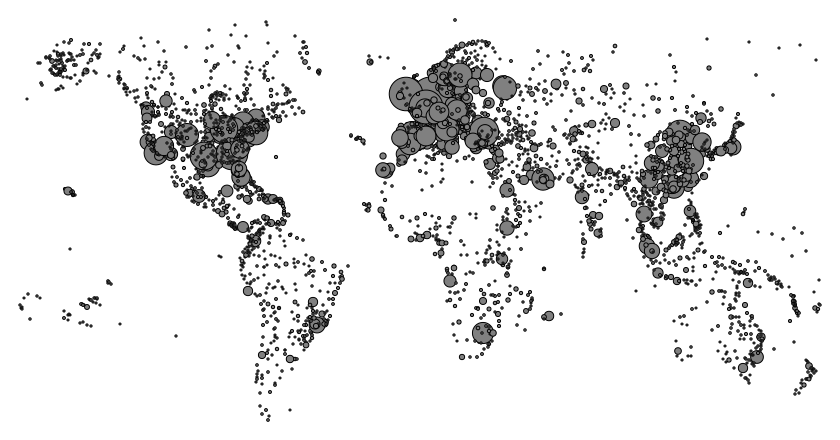

In [29]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

## To do

* Display the same world map with PageRank scores.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Display the world map with Personalized PageRank scores, starting from Tokyo international airport.
* List the corresponding 10 best ranked airports.

In [30]:
pagerank = PageRank()

In [31]:
scores = pagerank.fit_transform(adjacency)

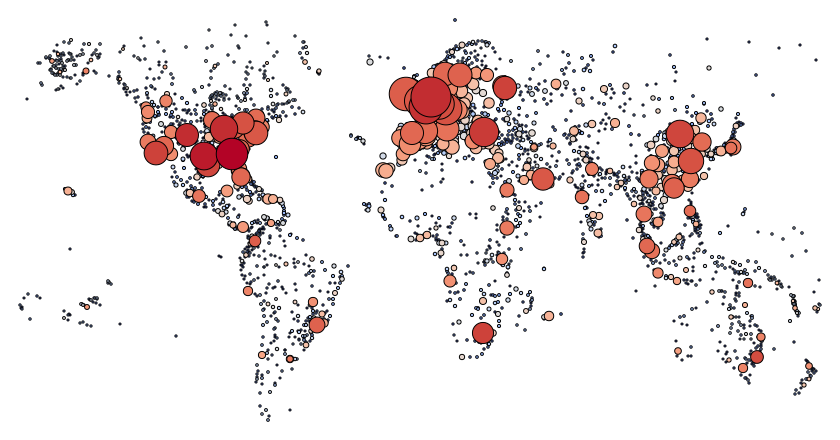

In [32]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), 
                  width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [33]:
print(names[top_k(scores, 10)])

['Hartsfield Jackson Atlanta International Airport'
 'Dallas Fort Worth International Airport' 'Amsterdam Airport Schiphol'
 "Chicago O'Hare International Airport" 'Denver International Airport'
 'Charles de Gaulle International Airport' 'Atatürk International Airport'
 'OR Tambo International Airport' 'Los Angeles International Airport'
 'Domodedovo International Airport']


In [34]:
weights = adjacency.dot(np.ones(len(names)))

In [35]:
print(names[top_k(weights, 10)])

['Amsterdam Airport Schiphol' 'Charles de Gaulle International Airport'
 'Dublin Airport' 'Munich International Airport'
 'Hartsfield Jackson Atlanta International Airport'
 'London Gatwick Airport' 'Frankfurt am Main International Airport'
 'Atatürk International Airport' 'Dallas Fort Worth International Airport'
 'Beijing Capital International Airport']


In [36]:
tokyo = {i: name for i, name in enumerate(names) if 'Tokyo' in name}

In [37]:
tokyo

{1084: 'Tokyo Haneda International Airport'}

In [38]:
tokyo = list(tokyo)[0]

In [41]:
# personalized PageRank
scores = pagerank.fit_transform(adjacency, {tokyo:1})

In [43]:
scores = pagerank.fit_transform(adjacency, (names=='Tokyo Haneda International Airport'))

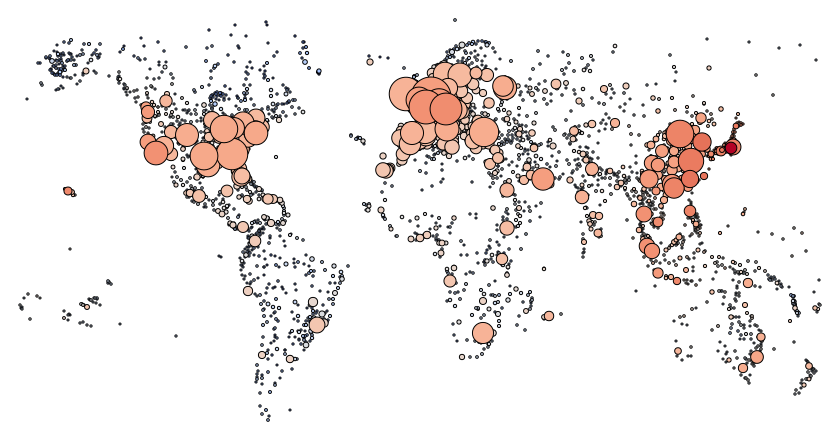

In [44]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), 
                  width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [45]:
print(names[top_k(scores, 10)])

['Tokyo Haneda International Airport' 'Incheon International Airport'
 'Naha Airport' 'Taiwan Taoyuan International Airport'
 'Osaka International Airport' 'Shanghai Pudong International Airport'
 'New Chitose Airport' 'Kansai International Airport'
 'Narita International Airport' 'Chubu Centrair International Airport']


## 2. Directed graphs

## Wikipedia Vitals

In [46]:
dataset = wikivitals

In [47]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [48]:
pagerank = PageRank()

In [49]:
scores = pagerank.fit_transform(adjacency)
print(names[top_k(scores, 10)])

['United States' 'World War II' 'The New York Times'
 'Geographic coordinate system' 'Latin' 'India' 'China' 'France'
 'United Kingdom' 'World War I']


In [50]:
out_degrees = adjacency.dot(np.ones(len(names)))
print(names[top_k(out_degrees, 10)])

['Europe' 'Africa' 'History of art' 'France' 'Human history'
 'Latin America' 'South America' 'Asia' 'Biology' 'Human']


In [51]:
in_degrees = adjacency.T.dot(np.ones(len(names)))
print(names[top_k(in_degrees, 10)])

['United States' 'The New York Times' 'World War II' 'India' 'China'
 'France' 'Geographic coordinate system' 'United Kingdom' 'Latin'
 'Australia']


## To do

* List the 20 closest pages to **Picasso** in Wikipedia Vitals. Who is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.
* In both cases, propose a method to get the 20 closest pages **specifically** related to the target(s). <br>**Hint:** Consider the difference between two PageRank scores.

In [52]:
scores_ppr = pagerank.fit_transform(adjacency, weights=names=='Pablo Picasso')

In [53]:
print(names[top_k(scores_ppr, 20)])

['Pablo Picasso' 'The New York Times' 'World War II' 'World War I' 'Paris'
 'Modernism' 'Museum of Modern Art' 'Cubism' 'Romanticism' 'Impressionism'
 'Metropolitan Museum of Art' 'Symbolism (arts)' 'Surrealism' 'Modern art'
 'United States' 'Time (magazine)' 'Paul Cézanne' 'Vincent van Gogh'
 'Post-Impressionism' 'Dada']


In [54]:
# more specific articles
print(names[top_k(scores_ppr - scores, 20)])

['Pablo Picasso' 'Modernism' 'Museum of Modern Art' 'Cubism' 'Paris'
 'Impressionism' 'Surrealism' 'Symbolism (arts)' 'Modern art'
 'Metropolitan Museum of Art' 'Paul Cézanne' 'Post-Impressionism'
 'Vincent van Gogh' 'Dada' 'Édouard Manet' 'Paul Gauguin' 'Expressionism'
 'Romanticism' 'World War I' 'Henri Matisse']


In [55]:
scores_ppr = pagerank.fit_transform(adjacency, weights=(names=='Cat')|(names=='Dog'))

In [56]:
print(names[top_k(scores_ppr, 20)])

['Dog' 'Cat' 'Taxonomy (biology)' 'Animal' 'Mammal' 'Chordate' 'Latin'
 'Carl Linnaeus' 'World War II' 'Carnivora' 'Pinniped' 'Lion' 'Leopard'
 'Brown bear' 'Fox' 'Polar bear' 'Hyena' 'Coyote' 'Bear' 'Jaguar']


In [57]:
# more specific articles
print(names[top_k(scores_ppr - scores, 20)])

['Dog' 'Cat' 'Animal' 'Mammal' 'Taxonomy (biology)' 'Chordate' 'Carnivora'
 'Fox' 'Leopard' 'Pinniped' 'Hyena' 'Coyote' 'Bear' 'Brown bear'
 'Polar bear' 'Weasel' 'Skunk' 'Felidae' 'Lion' 'Mustelidae']


## To do

* List 5 representative articles of each category.

In [58]:
labels = dataset.labels
names_labels = dataset.names_labels

In [59]:
names_labels

array(['Arts', 'Biological and health sciences', 'Everyday life',
       'Geography', 'History', 'Mathematics', 'People',
       'Philosophy and religion', 'Physical sciences',
       'Society and social sciences', 'Technology'], dtype='<U30')

In [60]:
for label in np.unique(labels):
    print(names_labels[label])
    scores_ppr = pagerank.fit_transform(adjacency, weights=labels==label)
    scores_ppr *= labels==label
    print(names[top_k(scores_ppr, 5)])
    print('--')

Arts
['Encyclopædia Britannica' 'Romanticism' 'Jazz' 'Modernism' 'Baroque']
--
Biological and health sciences
['Taxonomy (biology)' 'Animal' 'Chordate' 'Plant' 'Species']
--
Everyday life
['Olympic Games' 'Association football' 'Basketball' 'Baseball' 'Softball']
--
Geography
['Geographic coordinate system' 'United States' 'China' 'France' 'India']
--
History
['World War II' 'World War I' 'Roman Empire' 'Ottoman Empire'
 'Middle Ages']
--
Mathematics
['Real number' 'Function (mathematics)' 'Complex number'
 'Set (mathematics)' 'Integer']
--
People
['Aristotle' 'Plato' 'Augustine of Hippo' 'Winston Churchill'
 'Thomas Aquinas']
--
Philosophy and religion
['Christianity' 'Islam' 'Buddhism' 'Hinduism' 'Catholic Church']
--
Physical sciences
['Oxygen' 'Hydrogen' 'Earth' 'Kelvin' 'Density']
--
Society and social sciences
['The New York Times' 'Latin' 'English language' 'French language'
 'United Nations']
--
Technology
['NASA' 'Internet' 'Operating system' 'Computer network' 'Computer']
--


## 3. Bipartite graphs

## Cinema

In [61]:
dataset = cinema

In [62]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do


* List the 5 closest actors and the 5 closest movies to **Catherine Deneuve**.

In [63]:
biadjacency

<88440x44586 sparse matrix of type '<class 'numpy.bool_'>'
	with 304006 stored elements in Compressed Sparse Row format>

In [64]:
scores = pagerank.fit_transform(biadjacency, weights_col=actors=='Catherine Deneuve')

In [65]:
scores_movies = scores

In [66]:
# movies
print(movies[top_k(scores_movies, 5)])

['The Umbrellas of Cherbourg' 'The Beloved (2011 film)' 'Standing Tall'
 'In the Courtyard' 'A Christmas Tale']


In [67]:
scores_actors = pagerank.scores_col_

In [68]:
# actors
print(actors[top_k(scores_actors, 5)])

['Catherine Deneuve' 'Marcello Mastroianni' 'Gérard Depardieu'
 'Michel Piccoli' 'Chiara Mastroianni']


## 4. Directed graphs as bipartite graphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [69]:
dataset = wikivitals

In [70]:
adjacency = dataset.adjacency
names = dataset.names

## To do

Do the same experiments as above and compare both rankings:
* List the 10 best ranked pages of Wikipedia Vitals. 
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In [71]:
scores = pagerank.fit_transform(adjacency, force_bipartite=True)

In [72]:
print(names[top_k(scores, 10)])

['Europe' 'History of art' 'France' 'Africa' 'Human history'
 'Latin America' 'South America' 'Biology' 'Human' 'Asia']


In [73]:
scores = pagerank.fit_transform(adjacency, weights=names=='Pablo Picasso', force_bipartite=True)

In [74]:
print(names[top_k(scores, 20)])

['Pablo Picasso' 'Modernism' 'Cubism' 'Modern art' 'Impressionism'
 'Surrealism' "Les Demoiselles d'Avignon" 'Symbolism (arts)'
 'Modern architecture' 'Abstract expressionism' 'Expressionism' 'Pop art'
 'Dada' 'Avant-garde' 'Futurism' 'Minimalism' 'Postmodernism'
 'Thomas Mann' 'Paul Klee' 'Hermann Hesse']


In [75]:
scores = pagerank.fit_transform(adjacency, weights=(names=='Cat')|(names=='Dog'), force_bipartite=True)

In [76]:
print(names[top_k(scores, 20)])

['Dog' 'Cat' 'Wolf' 'Coyote' 'European badger' 'Lion' 'Tiger' 'Leopard'
 'Cougar' 'Brown bear' 'Bear' 'Carnivora' 'Stoat' 'Cheetah' 'Pinniped'
 'Polar bear' 'Jaguar' 'Wolverine' 'Mustelidae' 'Honey badger']
